In [1]:
## NN Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

## Other Dependencies
import pandas as pd
from matplotlib import pyplot as plt

## Initial Data import and pre-processing for Neural Network model

In [2]:
## Import dataset csv

churn_df = pd.read_csv('Resources/clean_churn_db.csv')
attrition_df = pd.read_csv('Resources/BankChurners.csv', usecols=['Attrition_Flag'])
churn_df

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,1,0,0,0,1,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,0,0,1,0,1,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,1,0,0,1,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,0,1,0,1,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,...,0,1,0,0,0,0,1,0,0,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,...,0,1,0,0,0,0,1,0,0,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,...,0,0,0,0,1,0,1,0,0,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,...,0,1,0,0,0,0,1,0,0,0


In [3]:
print(f"The amount of Attrited Customers/Existing Customers in the dataset is 1628/8500 or {round(1627/8500 * 100,2)}%")

The amount of Attrited Customers/Existing Customers in the dataset is 1628/8500 or 19.14%


In [4]:
for column in churn_df.columns:
    print(column)

Customer_Age
Dependent_count
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
Gender_F
Gender_M
Education_Level_College
Education_Level_Doctorate
Education_Level_Graduate
Education_Level_High School
Education_Level_Post-Graduate
Education_Level_Uneducated
Education_Level_Unknown
Marital_Status_Divorced
Marital_Status_Married
Marital_Status_Single
Marital_Status_Unknown
Income_Category_$120K +
Income_Category_$40K - $60K
Income_Category_$60K - $80K
Income_Category_$80K - $120K
Income_Category_Less than $40K
Income_Category_Unknown
Card_Category_Blue
Card_Category_Gold
Card_Category_Platinum
Card_Category_Silver


In [5]:
## Define feature values X
X = churn_df.values

## Define target values y
y_df = attrition_df.replace({'Existing Customer':0, 'Attrited Customer':1}).copy()
y = y_df['Attrition_Flag']

In [6]:
## Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)

In [7]:
## Instance Scaler
scaler = StandardScaler()

## Fit Scaler
X_scaler = scaler.fit(X_train)

## Scale Data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
len(X_train_scaled[0])

37

## Initial Modelling Attempt
Using all the availible features in the dataset

In [9]:
## Layering, beginning with 1 hidden layer
input_features = len(X_train[0])
hidden_layer_1 = 25
outputs = 1

nn = tf.keras.models.Sequential(name='initial')

## First Hidden Layer + Input
nn.add(tf.keras.layers.Dense(units = hidden_layer_1, input_dim = input_features, activation = 'relu'))

##Output Layer
nn.add(tf.keras.layers.Dense(units = outputs, activation='sigmoid'))

nn.summary()

Model: "initial"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                950       
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 976
Trainable params: 976
Non-trainable params: 0
_________________________________________________________________


In [10]:
## Compile and fit
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',])
initial_model = nn.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test) , epochs=100)

Epoch 1/100
238/238 [==============================] - 2s 3ms/step - loss: 0.4139 - accuracy: 0.8315 - val_loss: 0.3054 - val_accuracy: 0.8776
Epoch 2/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2878 - accuracy: 0.8876 - val_loss: 0.2633 - val_accuracy: 0.8953
Epoch 3/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2574 - accuracy: 0.8985 - val_loss: 0.2499 - val_accuracy: 0.9017
Epoch 4/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.9045 - val_loss: 0.2359 - val_accuracy: 0.9068
Epoch 5/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.9052 - val_loss: 0.2288 - val_accuracy: 0.9068
Epoch 6/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9099 - val_loss: 0.2231 - val_accuracy: 0.9147
Epoch 7/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9131 - val_loss: 0.2143 - val_accuracy: 0.9151

Epoch 58/100
238/238 [==============================] - 1s 2ms/step - loss: 0.1173 - accuracy: 0.9534 - val_loss: 0.1729 - val_accuracy: 0.9293
Epoch 59/100
238/238 [==============================] - 1s 3ms/step - loss: 0.1166 - accuracy: 0.9554 - val_loss: 0.1732 - val_accuracy: 0.9309
Epoch 60/100
238/238 [==============================] - 1s 3ms/step - loss: 0.1170 - accuracy: 0.9542 - val_loss: 0.1747 - val_accuracy: 0.9301
Epoch 61/100
238/238 [==============================] - 1s 2ms/step - loss: 0.1156 - accuracy: 0.9568 - val_loss: 0.1742 - val_accuracy: 0.9309
Epoch 62/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 0.9546 - val_loss: 0.1755 - val_accuracy: 0.9281
Epoch 63/100
238/238 [==============================] - 1s 3ms/step - loss: 0.1154 - accuracy: 0.9562 - val_loss: 0.1727 - val_accuracy: 0.9281
Epoch 64/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1148 - accuracy: 0.9562 - val_loss: 0.1729 - val_accuracy:

In [11]:
initial_loss, initial_accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 2)
print(f"Loss:{initial_loss}, Accuracy: {initial_accuracy}")

80/80 - 0s - loss: 0.1832 - accuracy: 0.9293 - 109ms/epoch - 1ms/step
Loss:0.18316081166267395, Accuracy: 0.9293048977851868


In [12]:
initial_loss, initial_accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 2)
print(f"Loss:{initial_loss}, Accuracy: {initial_accuracy}")

80/80 - 0s - loss: 0.1832 - accuracy: 0.9293 - 98ms/epoch - 1ms/step
Loss:0.18316081166267395, Accuracy: 0.9293048977851868


In [13]:
## What does this 93% accuracy mean?

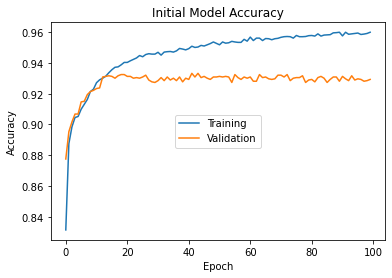

In [14]:
plt.plot(initial_model.history['accuracy'])
plt.plot(initial_model.history['val_accuracy'])
plt.title("Initial Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Training','Validation'], loc = 'center')
plt.show()

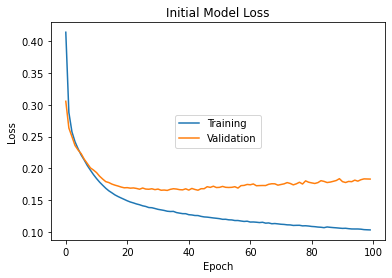

In [15]:
plt.plot(initial_model.history['loss'])
plt.plot(initial_model.history['val_loss'])
plt.title("Initial Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Training','Validation'], loc = 'center')
plt.show()

Model seems to be overfitted, adjustments to follow.

## Adjusting Model using L2 regularization

In [16]:
from tensorflow.keras import regularizers

In [17]:
## Layering, beginning with 1 hidden layer
input_features = len(X_train[0])
hidden_layer_1 = 25
outputs = 1

nn = tf.keras.models.Sequential(name='l2_reg')

## First Hidden Layer + Input
nn.add(tf.keras.layers.Dense(units = hidden_layer_1, input_dim = input_features, activation = 'relu',
                            kernel_regularizer=regularizers.l2(0.001)))

##Output Layer
nn.add(tf.keras.layers.Dense(units = outputs, activation='sigmoid'))

nn.summary()

Model: "l2_reg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 25)                950       
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 976
Trainable params: 976
Non-trainable params: 0
_________________________________________________________________


In [18]:
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',])
l1_reg = nn.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test) , epochs=100)

Epoch 1/100
238/238 [==============================] - 1s 3ms/step - loss: 0.5212 - accuracy: 0.7654 - val_loss: 0.3328 - val_accuracy: 0.8870
Epoch 2/100
238/238 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8937 - val_loss: 0.2886 - val_accuracy: 0.8989
Epoch 3/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2849 - accuracy: 0.9043 - val_loss: 0.2712 - val_accuracy: 0.9052
Epoch 4/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2671 - accuracy: 0.9080 - val_loss: 0.2592 - val_accuracy: 0.9084
Epoch 5/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2539 - accuracy: 0.9092 - val_loss: 0.2501 - val_accuracy: 0.9100
Epoch 6/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2434 - accuracy: 0.9131 - val_loss: 0.2406 - val_accuracy: 0.9119
Epoch 7/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2343 - accuracy: 0.9157 - val_loss: 0.2330 - val_accuracy: 0.9179

Epoch 58/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9510 - val_loss: 0.1776 - val_accuracy: 0.9360
Epoch 59/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1441 - accuracy: 0.9514 - val_loss: 0.1758 - val_accuracy: 0.9368
Epoch 60/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9500 - val_loss: 0.1782 - val_accuracy: 0.9348
Epoch 61/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1441 - accuracy: 0.9506 - val_loss: 0.1803 - val_accuracy: 0.9348
Epoch 62/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1441 - accuracy: 0.9510 - val_loss: 0.1780 - val_accuracy: 0.9356
Epoch 63/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.9513 - val_loss: 0.1908 - val_accuracy: 0.9333
Epoch 64/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1428 - accuracy: 0.9505 - val_loss: 0.1796 - val_accuracy:

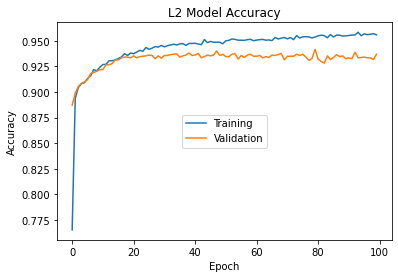

In [19]:
plt.plot(l1_reg.history['accuracy'])
plt.plot(l1_reg.history['val_accuracy'])
plt.title("L2 Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Training','Validation'], loc = 'center')
plt.show()

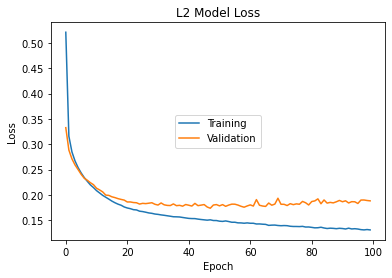

In [20]:
plt.plot(l1_reg.history['loss'])
plt.plot(l1_reg.history['val_loss'])
plt.title("L2 Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Training','Validation'], loc = 'center')
plt.show()

In [21]:
## Looks good at first, but the model still finds out a pattern early and does not adapt to new information

## Adjusting model using Dropout

In [22]:
## Layering, beginning with 1 hidden layer
input_features = len(X_train[0])
hidden_layer_1 = 25
outputs = 1

nn = tf.keras.models.Sequential(name='dropout')

## First Hidden Layer + Input

nn.add(tf.keras.layers.Dense(units = hidden_layer_1, input_dim = input_features, activation = 'relu'))
nn.add(tf.keras.layers.Dropout(.2))

##Output Layer
nn.add(tf.keras.layers.Dense(units = outputs, activation='sigmoid'))


nn.summary()

Model: "dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 25)                950       
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 976
Trainable params: 976
Non-trainable params: 0
_________________________________________________________________


In [23]:
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',])
dropout_model = nn.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test) , epochs=100)

Epoch 1/100
238/238 [==============================] - 1s 3ms/step - loss: 0.4444 - accuracy: 0.8034 - val_loss: 0.3157 - val_accuracy: 0.8851
Epoch 2/100
238/238 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8776 - val_loss: 0.2752 - val_accuracy: 0.8942
Epoch 3/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.8897 - val_loss: 0.2577 - val_accuracy: 0.8977
Epoch 4/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2678 - accuracy: 0.8940 - val_loss: 0.2467 - val_accuracy: 0.9036
Epoch 5/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2560 - accuracy: 0.8999 - val_loss: 0.2385 - val_accuracy: 0.9068
Epoch 6/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.8994 - val_loss: 0.2308 - val_accuracy: 0.9103
Epoch 7/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.9040 - val_loss: 0.2232 - val_accuracy: 0.9127

Epoch 58/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.9381 - val_loss: 0.1628 - val_accuracy: 0.9317
Epoch 59/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1494 - accuracy: 0.9427 - val_loss: 0.1610 - val_accuracy: 0.9336
Epoch 60/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1520 - accuracy: 0.9373 - val_loss: 0.1625 - val_accuracy: 0.9344
Epoch 61/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1487 - accuracy: 0.9431 - val_loss: 0.1626 - val_accuracy: 0.9352
Epoch 62/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1493 - accuracy: 0.9426 - val_loss: 0.1612 - val_accuracy: 0.9348
Epoch 63/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1499 - accuracy: 0.9379 - val_loss: 0.1629 - val_accuracy: 0.9360
Epoch 64/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.9438 - val_loss: 0.1643 - val_accuracy:

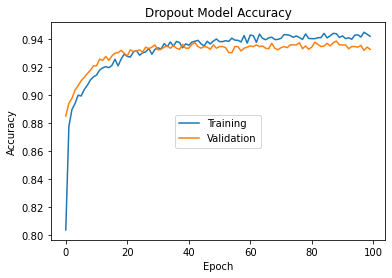

In [24]:
plt.plot(dropout_model.history['accuracy'])
plt.plot(dropout_model.history['val_accuracy'])
plt.title("Dropout Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Training','Validation'], loc = 'center')
plt.show()

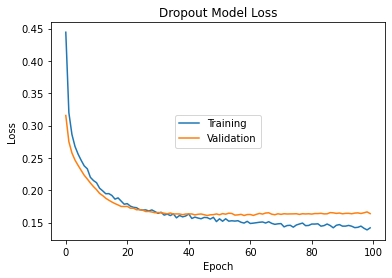

In [25]:
plt.plot(dropout_model.history['loss'])
plt.plot(dropout_model.history['val_loss'])
plt.title("Dropout Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Training','Validation'], loc = 'center')
plt.show()

## Using both L2 and Dropout

In [26]:
## Layering, beginning with 1 hidden layer
input_features = len(X_train[0])
hidden_layer_1 = 25
outputs = 1

nn = tf.keras.models.Sequential(name='dropout_and_l2')

## First Hidden Layer + Input
nn.add(tf.keras.layers.Dense(units = hidden_layer_1, input_dim = input_features, activation = 'relu',
                             kernel_regularizer=regularizers.l2(0.001)))
nn.add(tf.keras.layers.Dropout(.2))


##Output Layer
nn.add(tf.keras.layers.Dense(units = outputs, activation='sigmoid'))


nn.summary()

Model: "dropout_and_l2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                950       
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 976
Trainable params: 976
Non-trainable params: 0
_________________________________________________________________


In [27]:
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 
                                                                  tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
dropout_l2_model = nn.fit(X_train_scaled, y_train, validation_data = (X_test_scaled, y_test) , epochs=100)

Epoch 1/100
238/238 [==============================] - 2s 4ms/step - loss: 0.5269 - accuracy: 0.7639 - precision: 0.2824 - recall: 0.2849 - val_loss: 0.3551 - val_accuracy: 0.8724 - val_precision: 0.7101 - val_recall: 0.2572
Epoch 2/100
238/238 [==============================] - 1s 2ms/step - loss: 0.3542 - accuracy: 0.8757 - precision: 0.7035 - recall: 0.4189 - val_loss: 0.2986 - val_accuracy: 0.8953 - val_precision: 0.7339 - val_recall: 0.4777
Epoch 3/100
238/238 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8860 - precision: 0.7189 - recall: 0.5008 - val_loss: 0.2767 - val_accuracy: 0.9024 - val_precision: 0.7359 - val_recall: 0.5486
Epoch 4/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2944 - accuracy: 0.8927 - precision: 0.7371 - recall: 0.5377 - val_loss: 0.2618 - val_accuracy: 0.9056 - val_precision: 0.7536 - val_recall: 0.5538
Epoch 5/100
238/238 [==============================] - 0s 2ms/step - loss: 0.2795 - accuracy: 0.8981

238/238 [==============================] - 1s 2ms/step - loss: 0.1838 - accuracy: 0.9329 - precision: 0.8407 - recall: 0.7287 - val_loss: 0.1805 - val_accuracy: 0.9329 - val_precision: 0.7972 - val_recall: 0.7428
Epoch 38/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9325 - precision: 0.8329 - recall: 0.7360 - val_loss: 0.1793 - val_accuracy: 0.9325 - val_precision: 0.8070 - val_recall: 0.7244
Epoch 39/100
238/238 [==============================] - 1s 2ms/step - loss: 0.1769 - accuracy: 0.9348 - precision: 0.8454 - recall: 0.7376 - val_loss: 0.1799 - val_accuracy: 0.9333 - val_precision: 0.7994 - val_recall: 0.7428
Epoch 40/100
238/238 [==============================] - 1s 2ms/step - loss: 0.1764 - accuracy: 0.9325 - precision: 0.8422 - recall: 0.7239 - val_loss: 0.1789 - val_accuracy: 0.9344 - val_precision: 0.8063 - val_recall: 0.7428
Epoch 41/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.9352 - preci

238/238 [==============================] - 1s 2ms/step - loss: 0.1672 - accuracy: 0.9385 - precision: 0.8519 - recall: 0.7568 - val_loss: 0.1753 - val_accuracy: 0.9352 - val_precision: 0.8163 - val_recall: 0.7349
Epoch 74/100
238/238 [==============================] - 1s 2ms/step - loss: 0.1684 - accuracy: 0.9371 - precision: 0.8466 - recall: 0.7528 - val_loss: 0.1730 - val_accuracy: 0.9352 - val_precision: 0.8074 - val_recall: 0.7480
Epoch 75/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.9382 - precision: 0.8529 - recall: 0.7536 - val_loss: 0.1747 - val_accuracy: 0.9372 - val_precision: 0.8083 - val_recall: 0.7638
Epoch 76/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1656 - accuracy: 0.9410 - precision: 0.8575 - recall: 0.7681 - val_loss: 0.1763 - val_accuracy: 0.9336 - val_precision: 0.8179 - val_recall: 0.7192
Epoch 77/100
238/238 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.9382 - preci

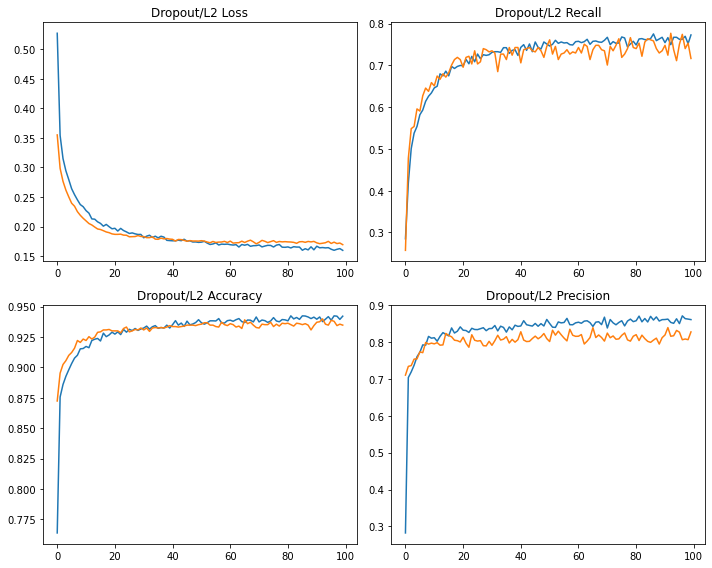

In [61]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0,0].plot(dropout_l2_model.history['loss'])
axs[0,0].plot(dropout_l2_model.history['val_loss'])
axs[0,0].set_title("Dropout/L2 Loss")

axs[1,0].plot(dropout_l2_model.history['accuracy'])
axs[1,0].plot(dropout_l2_model.history['val_accuracy'])
axs[1,0].set_title("Dropout/L2 Accuracy")

axs[0,1].plot(dropout_l2_model.history['recall'])
axs[0,1].plot(dropout_l2_model.history['val_recall'])
axs[0,1].set_title("Dropout/L2 Recall")

axs[1,1].plot(dropout_l2_model.history['precision'])
axs[1,1].plot(dropout_l2_model.history['val_precision'])
axs[1,1].set_title("Dropout/L2 Precision")

fig.tight_layout()